1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


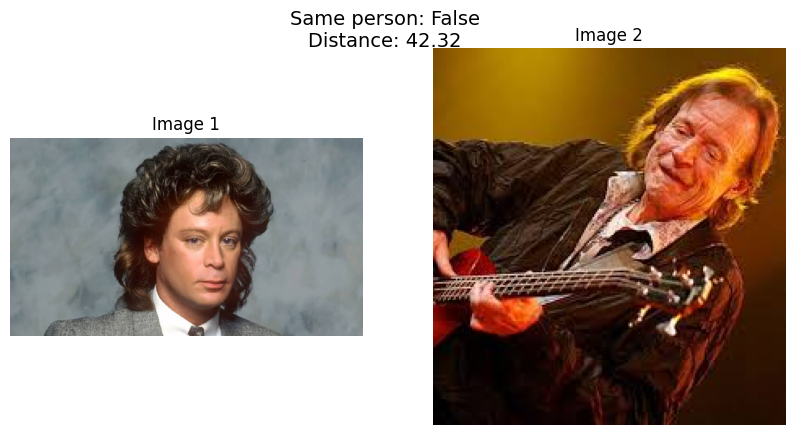

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Загрузка предобученной модели InceptionResNetV2 (аналог FaceNet)
def load_facenet_model():
    base_model = InceptionResNetV2(weights='imagenet', include_top=False, pooling='avg')
    face_input = Input(shape=(160, 160, 3), name='face_input')
    x = Lambda(lambda image: tf.image.resize(image, (160, 160)))(face_input)
    x = Lambda(lambda image: preprocess_input(image))(x)
    x = base_model(x)
    model = Model(inputs=face_input, outputs=x)
    return model

# Функция для извлечения признаков из изображения
def extract_features(model, img_path):
    img = image.load_img(img_path, target_size=(160, 160))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    features = model.predict(img_array)
    return features

# Функция для сравнения двух лиц (евклидово расстояние между признаками)
def compare_faces(features1, features2, threshold=1.0):
    distance = np.linalg.norm(features1 - features2)
    return distance < threshold, distance

# Функция для визуализации изображений и результата сравнения
def visualize_comparison(img1_path, img2_path, is_same_person, distance):
    img1 = cv2.imread(img1_path)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # Конвертация из BGR в RGB
    img2 = cv2.imread(img2_path)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  # Конвертация из BGR в RGB

    plt.figure(figsize=(10, 5))

    # Отображение первого изображения
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title('Image 1')
    plt.axis('off')

    # Отображение второго изображения
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title('Image 2')
    plt.axis('off')

    # Отображение результата сравнения
    result_text = f"Same person: {is_same_person}\nDistance: {distance:.2f}"
    plt.suptitle(result_text, fontsize=14, y=0.95)

    plt.show()

# Загрузка модели
facenet_model = load_facenet_model()

# Пример использования
img1_path = '/content/images.jpg'  # Укажите путь к первому изображению
img2_path = '/content/джек брюс.jpg'  # Укажите путь ко второму изображению

# Извлечение признаков
features1 = extract_features(facenet_model, img1_path)
features2 = extract_features(facenet_model, img2_path)

# Сравнение лиц
is_same_person, distance = compare_faces(features1, features2)

# Визуализация результатов
visualize_comparison(img1_path, img2_path, is_same_person, distance)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


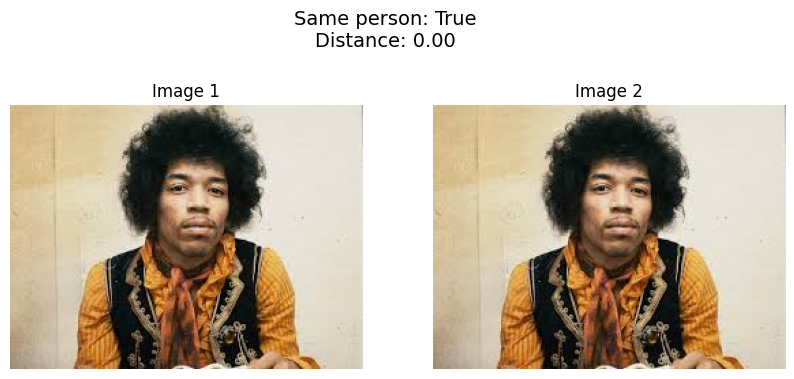

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Загрузка предобученной модели InceptionResNetV2 (аналог FaceNet)
def load_facenet_model():
    base_model = InceptionResNetV2(weights='imagenet', include_top=False, pooling='avg')
    face_input = Input(shape=(160, 160, 3), name='face_input')
    x = Lambda(lambda image: tf.image.resize(image, (160, 160)))(face_input)
    x = Lambda(lambda image: preprocess_input(image))(x)
    x = base_model(x)
    model = Model(inputs=face_input, outputs=x)
    return model

# Функция для извлечения признаков из изображения
def extract_features(model, img_path):
    img = image.load_img(img_path, target_size=(160, 160))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    features = model.predict(img_array)
    return features

# Функция для сравнения двух лиц (евклидово расстояние между признаками)
def compare_faces(features1, features2, threshold=1.0):
    distance = np.linalg.norm(features1 - features2)
    return distance < threshold, distance

# Функция для визуализации изображений и результата сравнения
def visualize_comparison(img1_path, img2_path, is_same_person, distance):
    img1 = cv2.imread(img1_path)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # Конвертация из BGR в RGB
    img2 = cv2.imread(img2_path)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  # Конвертация из BGR в RGB

    plt.figure(figsize=(10, 5))

    # Отображение первого изображения
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title('Image 1')
    plt.axis('off')

    # Отображение второго изображения
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title('Image 2')
    plt.axis('off')

    # Отображение результата сравнения
    result_text = f"Same person: {is_same_person}\nDistance: {distance:.2f}"
    plt.suptitle(result_text, fontsize=14, y=0.95)

    plt.show()

# Загрузка модели
facenet_model = load_facenet_model()

# Пример использования
img1_path = '/content/jimi_hen2.jpg'  # Укажите путь к первому изображению
img2_path = '/content/jimi_hen2.jpg'  # Укажите путь ко второму изображению

# Извлечение признаков
features1 = extract_features(facenet_model, img1_path)
features2 = extract_features(facenet_model, img2_path)

# Сравнение лиц
is_same_person, distance = compare_faces(features1, features2)

# Визуализация результатов
visualize_comparison(img1_path, img2_path, is_same_person, distance)